In [304]:
# Displaying the correct A matrix for each type : Forward. Central, Backward
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt


# Given parameters
n = 5  # Number of points in the stencil
l = 3  # Position of the derivative in the stencil (central for 5-point)
d = 1  # Derivative order

a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points

# Construct matrix A (Vandermonde-like matrix)
A = [[a[j]**i for j in range(n)] for i in range(n)]

# Construct vector b (condition vector)
b = [math.factorial(d) if i == d else 0 for i in range(n)]

# Display matrices A and b
A, b

([[1, 1, 1, 1, 1],
  [-2, -1, 0, 1, 2],
  [4, 1, 0, 1, 4],
  [-8, -1, 0, 1, 8],
  [16, 1, 0, 1, 16]],
 [0, 1, 0, 0, 0])

Matrices A and b are displayed correctly.

In [305]:
A_inv = np.linalg.inv(A)

In [306]:
h = 1

# computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
D = 1/h**d * np.dot(A_inv, b)

D

array([ 0.08333333, -0.66666667,  0.        ,  0.66666667, -0.08333333])

In [307]:
def returnStencilCoefficients(n,l,d,h):
    a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points
    # Construct matrix A (Vandermonde-like matrix)
    A = [[a[j]**i for j in range(n)] for i in range(n)]
    # Construct vector b (condition vector)
    b = [math.factorial(d) if i == d else 0 for i in range(n)]
        
    A_inv = np.linalg.inv(A)
    
    # h = 0.1 

    # computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
    D = 1/h**d * np.dot(A_inv, b)
        
    return D

In [308]:
returnStencilCoefficients(n=3,l=1,d=1,h=1)

array([-1.5,  2. , -0.5])

Calculations are correct till the evaluation of D,A and b (Tested with cases from lecture notes)

In [309]:
# Evaluation of e^x using this method
# we have evaluation point
x_val = 0 
 
x = [x_val - 2*h, x_val -1*h, x_val, x_val+h, x_val+2*h]
fx = np.exp(x)

derivative = np.dot(D, np.transpose(fx))
derivative

0.9624581902172321

Correct derivative functioning established

### Creating a generalised approach

In [310]:
a = -1.5
b = 1.5
N = 200

x_val = np.linspace(a,b,N+1)
# print(x_val)

# or can be assessed as N+1 points on the grid, N=10
# then, h = 0.5-(-0.5)/10
# now proceed
h = (b-a)/N
# print(h)

fx_vals = np.exp(x_val)
# print(fx_vals)

f_prime = np.zeros(len(x_val))

We need to generate the f'(x) for each of the above 11 points

But, 3 point central difference can be applied only t

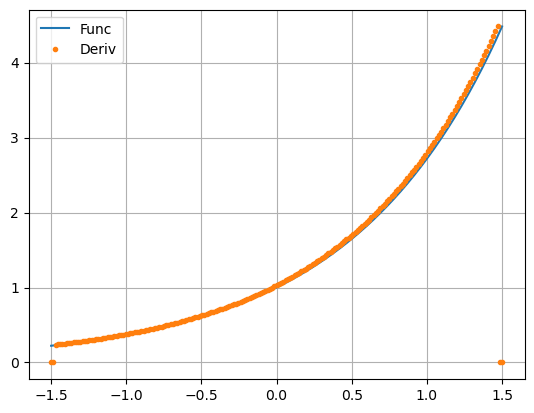

In [311]:
central_5_point_stencil = returnStencilCoefficients(5, (5+1//2), 1, h)

#applying the 3 point scheme to the central elements
for i in range(2,len(fx_vals)-2): # leaving first and last ones out
    # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
    # print(temp_x) 
    # properly being accessed
    
    temp_x = [fx_vals[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
    
    f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
    
f_prime

plt.plot(x_val, fx_vals,"-" ,  label = "Func")
plt.plot(x_val, f_prime, ".", label = "Deriv")
plt.legend()
plt.grid()

Going in the right direction, but still some deviation seems to exist, very evident at lower values